### Paola Della Foglia matr. 961014

# <span style="color:red"> Esercitazione numerica 12</span>

## <span style="color:blue"> Esercizio 12.1</span>

### Scopo

L'obiettivo di questa esercitazione è utilizzare modelli di DNNs (reti neurali profonde) implementati nel pacchetto Keras Python, per riconoscere e distinguere tra le dieci cifre scritte a mano (0-9).
Il set di dati MNIST comprende 70000 cifre scritte a mano, ciascuna delle quali viene rappresentata in un'immagine quadrata, suddivisa in una griglia di 28 × 28 pixel. Ogni pixel può assumere 256 gradazioni del colore grigio, interpolando tra bianco e nero, e quindi ogni punto dati assume un valore qualsiasi nell'intervallo {0,1,…, 255}. Poiché ci sono 10 categorie nel problema, corrispondenti alle dieci cifre, questo problema rappresenta un'attività di classificazione generica.

Provare ad utilizzare almeno altri due ottimizzatori, diversi da SGD, mantenendo fissati tutti gli altri parametri. 
Osservare l'accuratezza e la perdita dei dati di training e validazione e infine commentare le prestazioni.



In [24]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
#tf.set_random_seed(seed)
tf.random.set_seed(seed)

Importo il dataset di mnist

In [25]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


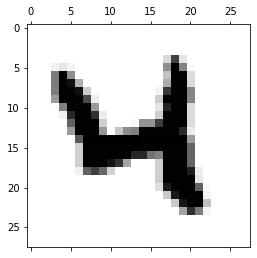

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [26]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

Costruiamo ora una DNNs (deep neural network)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax')) #per tradurre in probabilità
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


Ora scegliamo la funzione loss $\to$ categorical_crossentropy siccome questo è un problema di classificazione e scelgo un ottimizzatore $\to$ SGD (stocastich gradient descent) e come metrica $\to$ accuracy

In [28]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


Ora eseguo il training:

In [29]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7280 - accuracy: 0.7886 - val_loss: 0.3029 - val_accuracy: 0.9175
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3727 - accuracy: 0.8942 - val_loss: 0.2341 - val_accuracy: 0.9326
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3016 - accuracy: 0.9159 - val_loss: 0.1969 - val_accuracy: 0.9421
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2598 - accuracy: 0.9277 - val_loss: 0.1722 - val_accuracy: 0.9475
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2301 - accuracy: 0.9352 - val_loss: 0.1572 - val_accuracy: 0.9500


Dopo il training valuteremo la loss e l'accuracy:

313/313 [==============================] - 2s 5ms/step - loss: 0.1572 - accuracy: 0.9500

Test loss: 0.15715542435646057
Test accuracy: 0.949999988079071


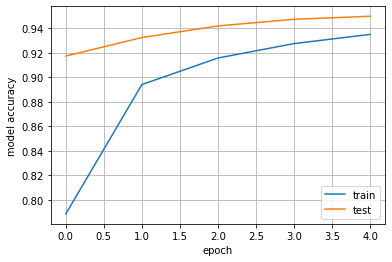

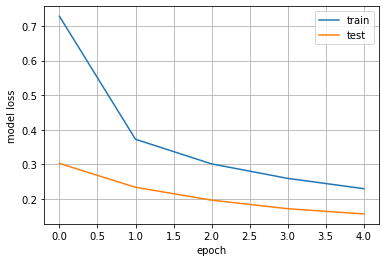

In [30]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

Dai grafici sopra si può visualizzare che solo dopo 5 epoche avremo un'accuratezza delle DNNs del 95%.

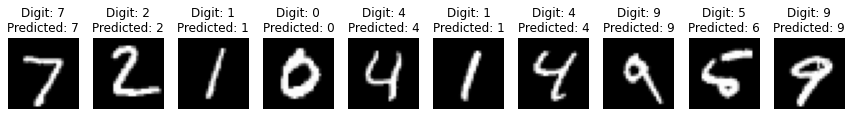

In [31]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Si nota che l'unica cifra di queste dieci che la NN non ha riconosciuto correttamente è stata la penultima, un 5, che può essere facilmente confuso con un 6 poiché è scritto male.

Quindi la probabilità di riconoscere la cifra scritta dalla rete neurale è elevata 90%.


**PROVA ALTRI OTTIMIZZATORI**

Ora cambio ottimizzatore e osservo come cambiano le funzioni costo ,training e il tempo di validazione per le epoche.

**SGD** 
- Test loss: 0.1572 
- Test accuracy: 0.9502
- Training time for epoch: 13s o 6ms/step 
****
        
**Adam** 
- Test loss: 0.076
- Test accuracy: 0.9776
- Training time for epoch: 14s o 7ms/step  

La probabilità di riconoscere la cifra scritta dalla rete neurale ottimizzata con Adam è del $97.8\%$.
****

Gli ottimizzatori scritti di seguito nello specchietto sono più lenti degli altri due precedenti, ma restituiscono risultati migliori.
        
**RMSprop** 
- Test loss: 0.1745
- Test accuracy: 0.9737
- Training time for epoch 20s o 11ms/step 

La probabilità di riconoscere la cifra scritta dalla rete neurale ottimizzata con RMSprop è del $97.3\%$.
****

            
**Adagrad** 
- Test loss: 0.3101
- Test accuracy: 0.9186
- Training time for epoch 15s o 9ms/step

La probabilità di riconoscere la cifra scritta dalla rete neurale ottimizzata con Adagrad è di circa $90\%$.
****

**Adadelta** 
- Test loss: 1.4465
- Test accuracy: 0.7536 
- Training time for epoch: 16s o 8ms/step

La probabilità di riconoscere la cifra scritta dalla rete neurale ottimizzata con Adagrad è di circa $75\%$.
****

**Adamax**

- Test loss: 0.0755 
- Test accuracy: 0.9760
- Training time for epoch: 14s o 8ms/step

La probabilità di riconoscere la cifra scritta dalla rete neurale ottimizzata con Adamax è di circa $97\%$.
****

**Nadam**

- Test loss: 0.0704 
- Test accuracy: 0.9805
- Training time for epoch: 26s o 14ms/step

La probabilità di riconoscere la cifra scritta dalla rete neurale ottimizzata con Adamax è di circa $97\%$.
****

Dai risultati mostrati nello specchietto possiamo concludere che la rete ottimizzata con l'ottimizzatore più comune, **SGD**, non fornisce le prestazioni migliori in termini di risultati: $95\%$ di accuratezza, ma è il migliore in termini di tempo di training per epoca. 

L'ottimizzatore **Adam** ha un'ottima loss, con una precisione di oltre $ 97 \% $ e un breve tempo di training per epoca.

L'ottimizzatore **Adadelta** invece, non è molto performante a discapito delle ipotesi, potrei migliorare le sue prestazioni aumentando il numero di epoche.

## <span style="color:blue"> Esercizio 12.2</span>

### Scopo

Costruire una rete neurale CNNs convoluzionale e fare il training della rete esattamente come abbiamo fatto per la DNNs nell' ex.12.1.


In [32]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Cambiare l'architettura della rete neurale passando dalla DNNs alla CNNs usando layer Conv2D, Maxpooling , Dropout e non dimenticare alla fine di fare un Flatten dei vari strati bidimensionali ottenuti e aggiungere uno o più layer densi e alla fine un softmax per andare a migliorare la probabilità per il riconoscimento delle 10 cifre.

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2,2),
                            strides=2,
                            padding='valid'))
    
    model.add(Conv2D(20, kernel_size=5,
                     strides=2,
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2),
                            strides=2,
                            padding='valid'))
    model.add(Flatten())
    model.add(Dense(400, activation='relu'))
    
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    return model

Epoch 1/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2547 - accuracy: 0.9231 - val_loss: 0.0696 - val_accuracy: 0.9767
Epoch 2/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0908 - accuracy: 0.9741 - val_loss: 0.0537 - val_accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0656 - accuracy: 0.9806 - val_loss: 0.0515 - val_accuracy: 0.9851
Epoch 4/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0522 - accuracy: 0.9853 - val_loss: 0.0537 - val_accuracy: 0.9837
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0489 - accuracy: 0.9868

Test loss: 0.04888537526130676
Test accuracy: 0.9868000149726868


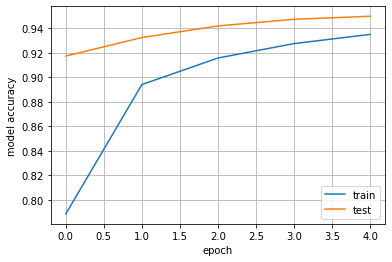

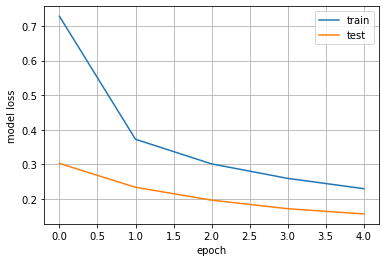

In [34]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

Abbiamo utilizzato l'ottimizzatore **Adam** viste le sue buone prestazioni verificate in precedenza. Questo ottimizzatore è veloce e fornisce un'accuratezza elevata superiore al $98.7\%$. con perdite basse.

In [ ]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

 Le reti neurali CNNs riescono a riconoscere, questa volta, tutte le cifre: la rete quindi lavora con un'accuratezza pari al $100\%$.

## <span style="color:blue"> Esercizio 12.3</span>

In questo esercizio useremo l'applicazione gimp per creare 10 immagini di cifre "scritte a mano" da noi.
Le importeremo nel jupyter-notebook e proveremo a vedere se la nostra rete neurale convoluzionale CNNs è in grado di riconoscere le cifre scritte a mano.

Image size: 28x28


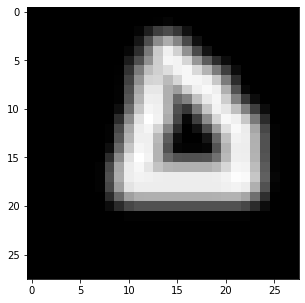

(28, 28)


In [48]:
import PIL as pillow
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

digit_filename = "./digit/0.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

Sopra è rappresentato uno zero scritto a mano con l'applicazione GIMP.

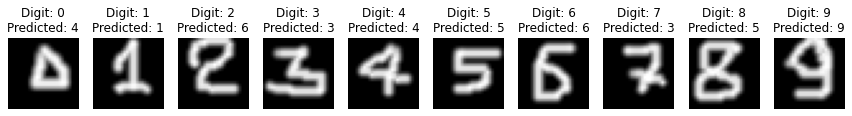

In [49]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [7,6]
plt.figure(figsize=(15, 15)) 

for l in range(10):
    digit_in = Image.open(f'digit/{l}.png').convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    ax = plt.subplot(2, 10, l + 1)
    plt.imshow(data, cmap='gray')
    data = data.reshape(1, img_rows, img_cols, 1)
    predicted = model_CNN.predict(data)
    plt.title(f"Digit: {l}\nPredicted: {np.argmax(predicted)}")    
    plt.axis('off')
plt.show()

La rete CNNs ha difficoltà a distinguere lo 0 dal 4, il 2 dal 6 , 7 da 3 e 8 da 5: molto probabilmente ciò è dovuto al modo in cui sono state scritte da me le cifre. 
Ciò mostra che questa rete è fallibile e ci sono ancora dei miglioramenti da fare, anche se bisogna ritenersi soddisfatti visto che le cifre non sono scritte molto comprensibilmente.
